In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

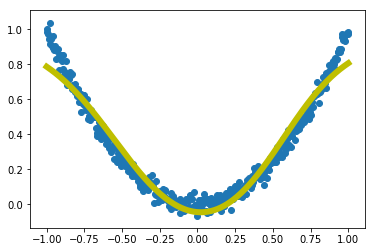

In [49]:
# create 400 points from -1 to 1
# convert an 1D array to a column vector 
x_data = np.linspace(-1, 1, 400)[:, np.newaxis]

# create some random samples from a normal (Gaussian) distribution
noise = np.random.normal(0,0.03, x_data.shape)

# create y_data
y_data = np.square(x_data) + noise

# Define two placeholders
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# Building Layer 1
w_l1 = tf.Variable(tf.random_normal([1, 10]))
b_l1 = tf.Variable(tf.zeros([1, 10]))
wx_plus_b_L1 = tf.matmul(x, w_l1) + b_l1
L1 = tf.nn.tanh(wx_plus_b_L1)

# Building Layer 2
w_l2 = tf.Variable(tf.random_normal([10, 1]))
b_l2 = tf.Variable(tf.zeros([1, 1]))
wx_plus_b_L2 = tf.matmul(L1, w_l2) + b_l2
prediction = tf.nn.tanh(wx_plus_b_L2)

# Calculate loss
loss = tf.reduce_mean(tf.square(y-prediction))

# Optimizing 
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(3000):
        sess.run(train_step, feed_dict={x:x_data, y:y_data})
    
    prediction_value = sess.run(prediction, feed_dict={x:x_data})
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'y-', lw=6)
    plt.show()